In [2]:
# Importando bibliotecas que vão ser utilizadadas para a visualização dos dados para analisar a composição e correlação entre eles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Lendo o arquivo tratado e reduzido anteriormente
df = pd.read_csv('base-reduzida-v2.csv', sep=',', encoding='utf-8', index_col=0)

In [4]:
# Visualizando o cabeçalho e alguns dados do dicionário
df.head()

,UF,Diagnóstico Depressão,Estado de Saúde,Pouco Interesse,Sentimento Depressivo,Sentimento de Fracasso,Ideação Suicida,Consumo Álcool,Dias Álcool,Dirigir Embriagado,...,Último Atendimento,Encaminhamento Acompanhamento,Compareceu Consulta,Limitação Atividade,Diagnóstico Bipolar,Visita Regular Doença,Sexo,Cor Raça,Estado de Saúde Geral,Motivo Impedimento
57,11,2.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,2.0,...,NaN,NaN,NaN,2.0,NaN,NaN,2.0,1.0,1.0,NaN
59,11,2.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,1.0,1.0,1.0,NaN
61,11,2.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,2.0,...,NaN,NaN,NaN,2.0,NaN,NaN,1.0,1.0,1.0,NaN
65,11,2.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,2.0,...,NaN,NaN,NaN,2.0,NaN,NaN,2.0,4.0,1.0,NaN
94,11,2.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,1.0,4.0,1.0,NaN


In [5]:
df.shape

(14328, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14328 entries, 57 to 293718
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   UF                             14328 non-null  int64  
 1   Diagnóstico Depressão          14328 non-null  float64
 2   Estado de Saúde                14328 non-null  float64
 3   Pouco Interesse                14328 non-null  float64
 4   Sentimento Depressivo          14328 non-null  float64
 5   Sentimento de Fracasso         14328 non-null  float64
 6   Ideação Suicida                14328 non-null  float64
 7   Consumo Álcool                 14328 non-null  float64
 8   Dias Álcool                    1568 non-null   float64
 9   Dirigir Embriagado             2198 non-null   float64
 10  Idade Diagnóstico              7584 non-null   float64
 11  Visita Regular                 4639 non-null   float64
 12  Motivo Não Visita              7584 non-null

In [7]:
#Tratando dados nulos e convertendo os tipos das colunas
df = df.fillna(value=-99)

df = df.astype(np.int64)
df['UF'] = df['UF'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14328 entries, 57 to 293718
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   UF                             14328 non-null  object
 1   Diagnóstico Depressão          14328 non-null  int64 
 2   Estado de Saúde                14328 non-null  int64 
 3   Pouco Interesse                14328 non-null  int64 
 4   Sentimento Depressivo          14328 non-null  int64 
 5   Sentimento de Fracasso         14328 non-null  int64 
 6   Ideação Suicida                14328 non-null  int64 
 7   Consumo Álcool                 14328 non-null  int64 
 8   Dias Álcool                    14328 non-null  int64 
 9   Dirigir Embriagado             14328 non-null  int64 
 10  Idade Diagnóstico              14328 non-null  int64 
 11  Visita Regular                 14328 non-null  int64 
 12  Motivo Não Visita              14328 non-null  int64 
 13 

In [8]:
# Embaralhar o DataFrame com base na semente
df = df.sample(frac=1, random_state=77)

C:\Users\r3hab\AppData\Local\Temp\ipykernel_26960\4092799247.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmin=-1, vmax=+1, annot=False, cmap='YlGnBu', linewidths=0, ax=ax)


<AxesSubplot: >

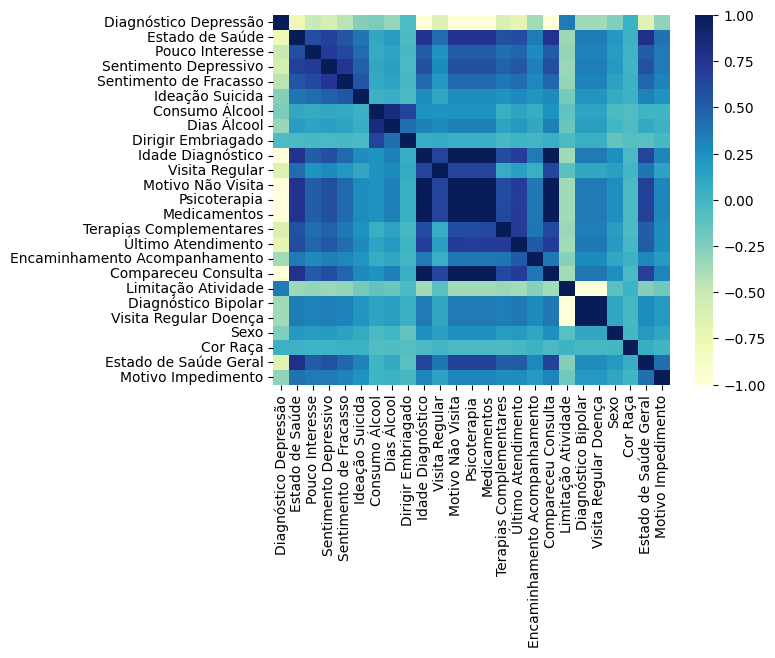

In [9]:
# Verificando como é a correlação das colunas do dataframe através de um heatmap
fig, ax = plt.subplots()
sns.heatmap(df.corr(), vmin=-1, vmax=+1, annot=False, cmap='YlGnBu', linewidths=0, ax=ax)

In [10]:
df

,UF,Diagnóstico Depressão,Estado de Saúde,Pouco Interesse,Sentimento Depressivo,Sentimento de Fracasso,Ideação Suicida,Consumo Álcool,Dias Álcool,Dirigir Embriagado,...,Último Atendimento,Encaminhamento Acompanhamento,Compareceu Consulta,Limitação Atividade,Diagnóstico Bipolar,Visita Regular Doença,Sexo,Cor Raça,Estado de Saúde Geral,Motivo Impedimento
35436,14,1,2,1,2,1,1,1,-99,-99,...,3,-99,1,2,-99,-99,2,4,1,-99
146805,27,2,1,1,1,1,1,1,-99,-99,...,-99,-99,-99,2,-99,-99,1,4,1,-99
278919,52,2,1,1,1,1,1,1,-99,-99,...,-99,-99,-99,2,-99,-99,1,3,1,-99
166244,29,2,1,1,1,1,1,2,-99,1,...,-99,-99,-99,2,-99,-99,2,4,2,-99
244628,42,1,2,3,1,1,1,1,-99,-99,...,2,-99,1,2,-99,-99,2,1,2,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161733,29,1,3,3,3,1,1,1,-99,-99,...,5,-99,3,2,-99,-99,2,4,3,2
134162,26,2,1,2,1,1,1,2,-99,2,...,-99,-99,-99,2,-99,-99,1,4,1,-99
181777,31,1,3,1,2,1,2,2,-99,-99,...,2,-99,3,2,-99,-99,2,4,3,-99
231702,41,1,2,2,2,2,1,3,3,-99,...,6,-99,3,1,2,2,2,1,2,-99


kmeans.fit(df.drop('Private',axis=1))


In [11]:
# Pessoas que tiveram diagnóstico de depressão: 1.0, Pessoas que não tiveram: 2.0, Ignorado: 3.0
counts = df['Diagnóstico Depressão'].value_counts()
counts

1    7551
2    6777
Name: Diagnóstico Depressão, dtype: int64

In [12]:
# Aplicação da Técninca de Decision Tree

<AxesSubplot: xlabel='Diagnóstico Depressão', ylabel='count'>

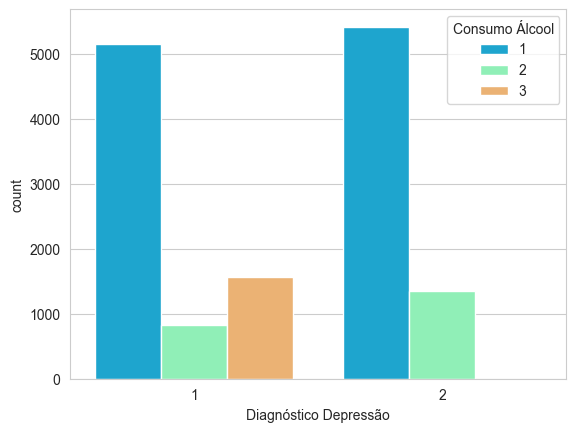

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='Diagnóstico Depressão',hue='Consumo Álcool',data=df,palette='rainbow')

<AxesSubplot: xlabel='Diagnóstico Depressão', ylabel='count'>

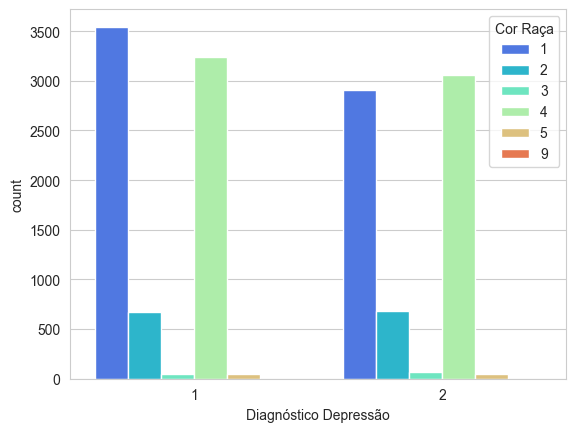

In [26]:

sns.set_style('whitegrid')
sns.countplot(x='Diagnóstico Depressão',hue='Cor Raça',data=df,palette='rainbow')

<AxesSubplot: xlabel='Diagnóstico Depressão', ylabel='count'>

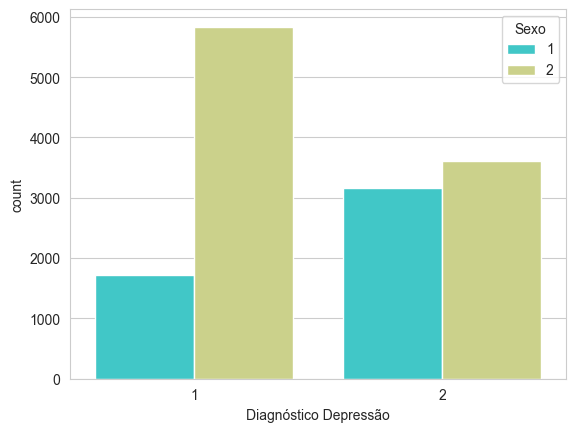

In [24]:

sns.set_style('whitegrid')
sns.countplot(x='Diagnóstico Depressão',hue='Sexo',data=df,palette='rainbow')

In [14]:
#sns.pairplot(df,hue='Diagnóstico Depressão',palette='Set1')

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [16]:
X = df.drop([ 'Consumo Álcool'], axis=1)  
y = df['Consumo Álcool'] 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [18]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
predictions = dtree.predict(X_test)


In [20]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.92      0.94      0.93      3143
           2       0.69      0.59      0.64       664
           3       1.00      1.00      1.00       492

    accuracy                           0.90      4299
   macro avg       0.87      0.84      0.86      4299
weighted avg       0.89      0.90      0.89      4299



In [22]:
accuracy = accuracy_score(y_test, predictions)
print('Acurácia:', accuracy)

Acurácia: 0.8957897185391952
